# Realizar una malla de búsqueda para los parámetros de árboles de decisión

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], test_size = 0.2)

In [ ]:
model = AdaBoostClassifier()

In [ ]:
grid = dict() # {}
grid['n_estimators'] = [50, 100, 250, 500]
grid['learning_rate'] = [0.0001, 0.001, .01, 0.1]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth=1),
                          DecisionTreeClassifier(max_depth=2),
                          DecisionTreeClassifier(max_depth=4),
                          DecisionTreeClassifier(max_depth=8)]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

print(grid_result.best_params_)



{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 250}


In [ ]:
print(grid_result.best_params_["n_estimators"])

250


In [ ]:
clf = AdaBoostClassifier(n_estimators=grid_result.best_params_["n_estimators"], learning_rate = grid_result.best_params_["learning_rate"], base_estimator= grid_result.best_params_["base_estimator"])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix AdaBoost')

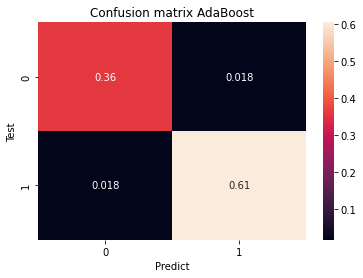

In [ ]:
sn.heatmap(confusion_matrix(y_pred, y_test)/len(y_pred),annot=True)
plt.xlabel('Predict')
plt.ylabel('Test')
plt.title('Confusion matrix AdaBoost')

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))

Precision: 0.972
Recall: 0.972
Accuracy: 0.965
F1: 0.972
